# unit8 인구 구조를 다양한 형태로 시각화하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

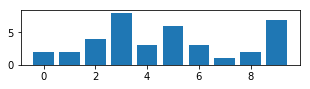

In [2]:
# 막대그래프(x,y)
plt.figure(figsize=(5,1))
plt.bar(np.arange(10), np.random.randint(1,10,size=10))

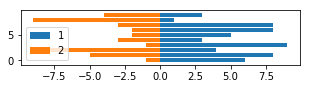

In [3]:
plt.figure(figsize=(5,1))
plt.barh(np.arange(10), np.random.randint(1,10,size=10), label='1')  #bar hoizontal
plt.barh(np.arange(10), - np.random.randint(1,10,size=10), label='2')  #bar hoizontal
plt.legend()

In [4]:
#p115
df = pd.read_csv('anyang_people.csv', encoding='cp949')
df = df.replace(',','', regex=True)
df.shape

(34, 207)

- 특정 도시(안양)의 여성과 남성의 나이별 인구수 대조
- 컬럼 위치 찾기 : 남 0세 ~ 남 90세, 여 0세 ~ 여 90세
- 0세:10명, 1세:20명, ....도시에서 모두 누적 > 막대 그래프로 표현

In [5]:
'a' in 'abc', 'x' in 'abc'

(True, False)

In [15]:
max_age = 99
city = '경기도 안양시 동안구 부림동'
man_0 = '2019년05월_남_0세'
woman_0 = '2019년05월_여_0세'
type(list(df.columns))
columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
man_0_index
print(columns[man_0_index], columns[man_0_index + max_age],  # 0세,90세 위치 찾기
columns[woman_0_index], columns[woman_0_index + max_age]  # 0세,90세 위치 찾기
     )

2019년05월_남_0세 2019년05월_남_99세 2019년05월_여_0세 2019년05월_여_99세


In [16]:
data = np.array(df)
area = data[:,0]
area[:3]
city_row_index = 0
for i in range(len(area)):
    if city in area[i]:
        city_row_index = i
        print(city_row_index, area[i])

24 경기도 안양시 동안구 부림동(4117356600)


In [17]:
city_data = data[city_row_index]
city_man = city_data[man_0_index:man_0_index + max_age].astype(np.int)
city_woman = city_data[woman_0_index:woman_0_index + max_age].astype(np.int)
city_man.shape, city_woman.shape

((99,), (99,))

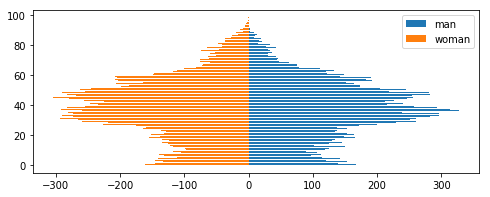

In [18]:
plt.figure(figsize=(8,3))
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

In [19]:
city = '안양' #이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(True만 뽑기)
is_contain = []
for i in range(len(area)):
    is_contain.append(city in area[i])
np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

(34, 207)

In [20]:
city_man = city_data[:, man_0_index:man_0_index + max_age].astype(np.int)
city_woman = city_data[:, woman_0_index:woman_0_index + max_age].astype(np.int)

city_man.shape, city_woman.shape

sum_city_man = np.sum(city_man, axis=0)
sum_city_woman = np.sum(city_woman, axis=0)

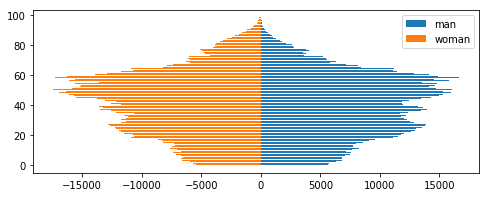

In [21]:
plt.figure(figsize=(8,3))
m = plt.barh(np.arange(len(sum_city_man)), sum_city_man, label='man')
m = plt.barh(np.arange(len(sum_city_woman)), -sum_city_woman, label='woman')
m = plt.legend()

In [22]:
df.columns


Index(['행정구역', '2019년05월_남_총인구수', '2019년05월_남_연령구간인구수', '2019년05월_남_0세',
       '2019년05월_남_1세', '2019년05월_남_2세', '2019년05월_남_3세', '2019년05월_남_4세',
       '2019년05월_남_5세', '2019년05월_남_6세',
       ...
       '2019년05월_여_91세', '2019년05월_여_92세', '2019년05월_여_93세', '2019년05월_여_94세',
       '2019년05월_여_95세', '2019년05월_여_96세', '2019년05월_여_97세', '2019년05월_여_98세',
       '2019년05월_여_99세', '2019년05월_여_100세 이상'],
      dtype='object', length=207)

In [23]:
df.head(1)

,행정구역,2019년05월_남_총인구수,2019년05월_남_연령구간인구수,2019년05월_남_0세,2019년05월_남_1세,2019년05월_남_2세,2019년05월_남_3세,2019년05월_남_4세,2019년05월_남_5세,2019년05월_남_6세,...,2019년05월_여_91세,2019년05월_여_92세,2019년05월_여_93세,2019년05월_여_94세,2019년05월_여_95세,2019년05월_여_96세,2019년05월_여_97세,2019년05월_여_98세,2019년05월_여_99세,2019년05월_여_100세 이상
0,경기도 안양시 (4117000000),283867,283867,1871,1921,2102,2266,2277,2269,2350,...,275,221,178,112,81,87,46,45,18,116


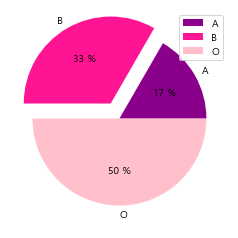

In [32]:
#p130, p134 파이 돌출 효과
plt.rc('font', family='Malgun Gothic')
color = ['darkmagenta', 'deeppink', 'pink']
n = plt.pie([10,20,30], labels=['A','B','O'], autopct='%.0f %%', colors=color, explode = (0, 0.2, 0))
n = plt.legend()

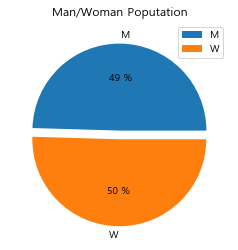

In [37]:
plt.title('Man/Woman Poputation')
colors = ['skyblue','pink']
n = plt.pie([np.sum(city_man), np.sum(city_woman)], labels=['M','W'], autopct='%d %%', explode=(0, 0.1))
n = plt.legend()

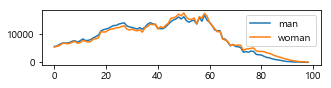

In [39]:
plt.figure(figsize=(5,1))
p = plt.plot(sum_city_man, label='man')
p = plt.plot(sum_city_woman, label='woman')
plt.legend()

<BarContainer object of 99 artists>

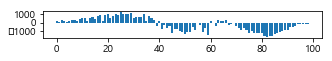

In [58]:
#p144 남녀 인구의 차이
plt.figure(figsize=(5,0.5))
plt.bar(np.arange(len(sum_city_man)), sum_city_man - sum_city_woman)

<ul> unordered list tag <ol> ordered list
1. plot(x) plot(x,y) 선
1. hist(x) 히스토그램
1. boxplot(x) 박스 : 분포
1. bar(x,y) barh(x,y) 막대그래프
1. pie(x)
1. scatter(x,y) 산점도

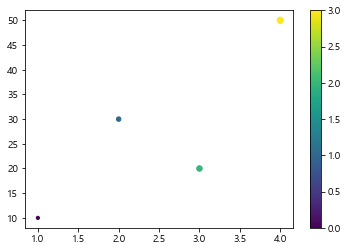

In [50]:
#p144 산점도(scatter) 산개할 산, 점 점, 그림 도
#p146 s(size), c(color)
color = ['red','green','black','gold']
color = 'blue'
n = plt.scatter([1,2,3,4],[10,30,20,50], s=[10,20,30,40], c=range(4))
n = plt.colorbar()

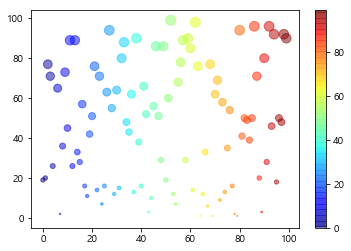

In [57]:
y = np.random.randint(0, 100, size=100)
n = plt.scatter(np.arange(len(y)),y, s=y, c=range(len(y)), cmap='jet', alpha=0.5)
n = plt.colorbar()